In [56]:
#Author: Elaine Ng
#Date: September 24, 2020

#Importing all the libraries that I need for this assignment
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from math import sqrt
from collections import Counter

In [57]:
#PART 1: Data Exploration
#Importing the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']
dataset = pd.read_csv(url, names = new_names, header = None)
dataset.info()
dataset.head(30)

numpy_version = dataset.values
#print(type(numpy_version))
x_values = numpy_version[ : ,0:4] 
#print(x_values)
y_values = numpy_version[:,4]
#print(y_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
#Question 1: Getting the number of classes and how many dataset there is for each class
dataset.iris_class.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: iris_class, dtype: int64

In [59]:
#Question 2: Min and Max of each attributes
print("Min sepal_length = {} cm".format(dataset.sepal_length.min()))
print("Max sepal_length = {} cm".format(dataset.sepal_length.max()))

print("Min sepal_width = {} cm".format(dataset.sepal_width.min()))
print("Max sepal_width = {} cm".format(dataset.sepal_width.max()))

print("Min petal_length = {} cm".format(dataset.petal_length.min()))
print("Max petal_length = {} cm".format(dataset.petal_length.max()))

print("Min petal_width = {} cm".format(dataset.petal_width.min()))
print("Max petal_width = {} cm".format(dataset.petal_width.max()))

Min sepal_length = 4.3 cm
Max sepal_length = 7.9 cm
Min sepal_width = 2.0 cm
Max sepal_width = 4.4 cm
Min petal_length = 1.0 cm
Max petal_length = 6.9 cm
Min petal_width = 0.1 cm
Max petal_width = 2.5 cm


<function matplotlib.pyplot.show>

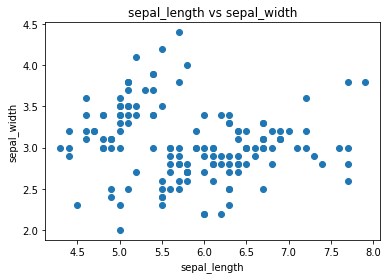

In [60]:
#Question 3A: Scatterplot of sepal_length vs sepal_width
x = dataset.sepal_length
y = dataset.sepal_width
plt.scatter(x,y)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal_length vs sepal_width')
plt.show

<function matplotlib.pyplot.show>

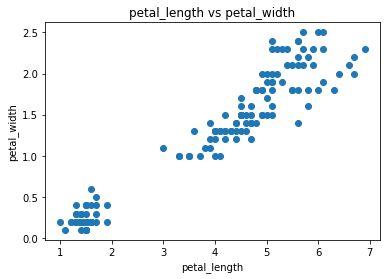

In [61]:
#Question 3B: Scatterplot of petal_length vs petal_width
x = dataset.petal_length
y = dataset.petal_width
plt.scatter(x,y)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_length vs petal_width')
plt.show

In [62]:
#Question 4A: R^2 for sepal_length and sepal_width
X = np.array(dataset.sepal_length).reshape(-1,1)
y = np.array(dataset.sepal_width).reshape(-1,1)
reg = LinearRegression().fit(X, y)
print('The R^2 for sepal_length and sepal_width is:')
reg.score(X, y)

The R^2 for sepal_length and sepal_width is:


0.0119616328347677

In [63]:
#Question 4B: R^2 for petal_length and petal_width
X = np.array(dataset.petal_length).reshape(-1,1)
y = np.array(dataset.petal_width).reshape(-1,1)
reg = LinearRegression().fit(X, y)
print('The R^2 for petal_length and petal_width is:')
reg.score(X, y)

The R^2 for petal_length and petal_width is:


0.9269012279220037

In [64]:
#PART 2: k Nearest Neighbor
#Importing the dataset and randomizing it. 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']
iris_df = pd.read_csv(url, header=None, names = new_names)
iris_df = iris_df.sample(frac=1, random_state=123).reset_index(drop=True)

iris = iris_df.values
X = iris[:,0:4]
y = iris[:,4]

#Declaring tables used to calculate accuracy 
accuracy_array = [0, 0, 0, 0, 0]
average_accuracy = [0, 0, 0, 0]

In [65]:
#Question 1: KNN classifier

#Calculating the Euclidean Distance
def euclidean_distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2)**2))

#Calculating accuracy 
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

#The KNN classifier
class KNN:
  def __init__(self, k = 1):
    self.k = k

#Fit the data
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

#Predict the class given a dataset
  def predict(self, X):
    y_pred = [self.pred(x) for x in X]
    return np.array(y_pred)

#Voting for the k nearest neighbor
  def pred(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_indices]  
        vote = Counter(k_neighbor_labels).most_common(1)
        return vote[0][0]



In [66]:
#KNN classifier with five-fold cross validation for k = 1
#Question 2: Accuracy for each fold and the average accuracy across all 5 folds for k = 1

#Splitting datasets into 5 folds
X_fold1 = X[0:30]
y_fold1 = y[0:30]
X_fold2 = X[30:60]
y_fold2 = y[30:60]
X_fold3 = X[60:90]
y_fold3 = y[60:90]
X_fold4 = X[90:120]
y_fold4 = y[90:120]
X_fold5 = X[120:150]
y_fold5 = y[120:150]

#For k = 1, fold = 1
X_test = X[0:30]
y_test = y[0:30]
X_train = X[30:150]
y_train = y[30:150]
k = 1
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold1)
accuracy_array[0] = accuracy(y_fold1, predictions)

#For k = 1, fold = 2
X_test = X[30:60]
y_test = y[30:60]
X_train = np.concatenate([X[0:30], X[60:150]])
y_train = np.concatenate([y[0:30], y[60:150]])

k = 1
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold2)
accuracy_array[1] = accuracy(y_fold2, predictions)

#For k = 1, fold = 3
X_test = X[60:90]
y_test = y[60:90]
X_train = np.concatenate([X[0:60], X[90:150]])
y_train = np.concatenate([y[0:60], y[90:150]])

k = 1
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold3)
accuracy_array[2] = accuracy(y_fold3, predictions)

#For k = 1, fold = 4
X_test = X[90:120]
y_test = y[90:120]
X_train = np.concatenate([X[0:90], X[120:150]])
y_train = np.concatenate([y[0:90], y[120:150]])

k = 1
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold4)
accuracy_array[3] = accuracy(y_fold4, predictions)

#For k = 1, fold = 5
X_test = X[120:150]
y_test = y[120:150]
X_train = X[:120]
y_train = y[:120]

k = 1
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold5)
accuracy_array[4] = accuracy(y_fold5, predictions)

#Printing the accuracy array for all folds for k = 1
print('The accuracy for each fold is in the array below:')
print(accuracy_array)

#Calculating the average accuracy for k = 1 over the 5 folds
average_accuracy[0] = np.sum(accuracy_array) / 5
print('The average accuracy for k = %d:' %k)
print(average_accuracy[0])

The accuracy for each fold is in the array below:
[0.9, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333]
The average accuracy for k = 1:
0.9533333333333334


In [67]:
#Finding the accuracy for each fold and the average accuracy for k = 3

#For k = 3, fold = 1
X_test = X[0:30]
y_test = y[0:30]
X_train = X[30:150]
y_train = y[30:150]

k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold1)
accuracy_array[0] = accuracy(y_fold1, predictions)

#For k = 3, fold = 2
X_test = X[30:60]
y_test = y[30:60]
X_train = np.concatenate([X[0:30], X[60:150]])
y_train = np.concatenate([y[0:30], y[60:150]])

k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold2)
accuracy_array[1] = accuracy(y_fold2, predictions)

#For k = 3, fold = 3
X_test = X[60:90]
y_test = y[60:90]
X_train = np.concatenate([X[0:60], X[90:150]])
y_train = np.concatenate([y[0:60], y[90:150]])

k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold3)
accuracy_array[2] = accuracy(y_fold3, predictions)

#For k = 3, fold = 4
X_test = X[90:120]
y_test = y[90:120]
X_train = np.concatenate([X[0:90], X[120:150]])
y_train = np.concatenate([y[0:90], y[120:150]])

k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold4)
accuracy_array[3] = accuracy(y_fold4, predictions)

#For k = 3, fold = 5
X_test = X[120:150]
y_test = y[120:150]
X_train = X[:120]
y_train = y[:120]

k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold5)
accuracy_array[4] = accuracy(y_fold5, predictions)

#Printing the accuracy array for all folds for k = 3
print('The accuracy for each fold is in the array below:')
print(accuracy_array)

#Calculating the average accuracy for k = 3 over the 5 folds
average_accuracy[1] = np.sum(accuracy_array) / 5
print('The average accuracy for k = %d:' %k)
print(average_accuracy[1])

The accuracy for each fold is in the array below:
[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]
The average accuracy for k = 3:
0.96


In [68]:
#Finding the accuracy for each fold and the average accuracy for k = 5

#For k = 5, fold = 1
X_test = X[0:30]
y_test = y[0:30]
X_train = X[30:150]
y_train = y[30:150]

k = 5
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold1)
accuracy_array[0] = accuracy(y_fold1, predictions)

#For k = 5, fold = 2
X_test = X[30:60]
y_test = y[30:60]
X_train = np.concatenate([X[0:30], X[60:150]])
y_train = np.concatenate([y[0:30], y[60:150]])

k = 5
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold2)
accuracy_array[1] = accuracy(y_fold2, predictions)

#For k = 5, fold = 3
X_test = X[60:90]
y_test = y[60:90]
X_train = np.concatenate([X[0:60], X[90:150]])
y_train = np.concatenate([y[0:60], y[90:150]])

k = 5
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold3)
accuracy_array[2] = accuracy(y_fold3, predictions)

#For k = 5, fold = 4
X_test = X[90:120]
y_test = y[90:120]
X_train = np.concatenate([X[0:90], X[120:150]])
y_train = np.concatenate([y[0:90], y[120:150]])

k = 5
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold4)
accuracy_array[3] = accuracy(y_fold4, predictions)

#For k = 5, fold = 5
X_test = X[120:150]
y_test = y[120:150]
X_train = X[:120]
y_train = y[:120]

k = 5
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold5)
accuracy_array[4] = accuracy(y_fold5, predictions)

#Printing the accuracy array for all folds for k = 5
print('The accuracy for each fold is in the array below:')
print(accuracy_array)

#Calculating the average accuracy for k = 5 over the 5 folds
average_accuracy[2] = np.sum(accuracy_array) / 5
print('The average accuracy for k = %d:' %k)
print(average_accuracy[2])

The accuracy for each fold is in the array below:
[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]
The average accuracy for k = 5:
0.96


In [69]:
#Finding the accuracy for each fold and the average accuracy for k = 7

#For k = 7, fold = 1
X_test = X[0:30]
y_test = y[0:30]
X_train = X[30:150]
y_train = y[30:150]

k = 7
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold1)
accuracy_array[0] = accuracy(y_fold1, predictions)

#For k = 7, fold = 2
X_test = X[30:60]
y_test = y[30:60]
X_train = np.concatenate([X[0:30], X[60:150]])
y_train = np.concatenate([y[0:30], y[60:150]])

k = 7
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold2)
accuracy_array[1] = accuracy(y_fold2, predictions)

#For k = 7, fold = 3
X_test = X[60:90]
y_test = y[60:90]
X_train = np.concatenate([X[0:60], X[90:150]])
y_train = np.concatenate([y[0:60], y[90:150]])

k = 7
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold3)
accuracy_array[2] = accuracy(y_fold3, predictions)

#For k = 7, fold = 4
X_test = X[90:120]
y_test = y[90:120]
X_train = np.concatenate([X[0:90], X[120:150]])
y_train = np.concatenate([y[0:90], y[120:150]])

k = 7
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold4)
accuracy_array[3] = accuracy(y_fold4, predictions)

#For k = 7, fold = 5
X_test = X[120:150]
y_test = y[120:150]
X_train = X[:120]
y_train = y[:120]

k = 7
clf = KNN(k=k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_fold5)
accuracy_array[4] = accuracy(y_fold5, predictions)

#Printing the accuracy array for all folds for k = 7
print('The accuracy for each fold is in the array below:')
print(accuracy_array)

#Calculating the average accuracy for k = 7 over the 5 folds
average_accuracy[3] = np.sum(accuracy_array) / 5
print('The average accuracy for k = %d:' %k)
print(average_accuracy[3])

The accuracy for each fold is in the array below:
[0.9333333333333333, 1.0, 1.0, 0.9666666666666667, 0.9333333333333333]
The average accuracy for k = 7:
0.9666666666666668


In [70]:
#Question 3: Create a table showing the performance of k = 1, 3, 5, and 7 in percentages
table = DataFrame({'K': [1, 3, 5, 7], 'Accuracy': [average_accuracy[0]*100, average_accuracy[1]*100, average_accuracy[2]*100, average_accuracy[3]*100]})
table

,K,Accuracy
0,1,95.333333
1,3,96.000000
2,5,96.000000
3,7,96.666667
